### <b>Turn Crestlines into Shapefile</b>

"""600DPI TIFF"""
Just give images, professor do formatting
Need good colors to make people read paper
Colors need to be visible in black-white version
invert TBK (white background)
Thicken TBK crest lines (not too much that it obscures detail)


In [1]:
import numpy as np
from shapely.geometry import LineString
import geopandas as gpd
from FeatureLines import ReadCrestLine, get_mesh
import matplotlib.pyplot as plt
from numpy.typing import NDArray

In [2]:
project_filename = '' # name of this project, only used for saving results
crestline_V_3d, crestline_E = ReadCrestLine('TBK_lidar_PC_ML_mesh_d=11_k=4_ravines.txt')

In [ ]:
"""Visualizing crest lines"""
import meshplot as mp
plot = mp.plot(v=crestline_V_3d)
plot.add_lines(beginning=crestline_V_3d[crestline_E[:,0]], 
            ending=crestline_V_3d[crestline_E[:,1]])

In [3]:
"""Process crest lines"""
def from_end_points(start_points : NDArray, end_points : NDArray, 
  ):
  list_of_lines : list[LineString] = []
  number_of_points = len(start_points)
  print(f"there are {number_of_points}")
  for i in range(number_of_points):
    list_of_lines.append(LineString([start_points[i], end_points[i]]))
  return list_of_lines
def from_end_points_multiplier(start_points : NDArray, end_points : NDArray, 
  multiplier : float):
  list_of_lines : list[LineString] = []
  number_of_points = len(start_points)
  print(f"there are {number_of_points}")
  for i in range(number_of_points):
    list_of_lines.append(LineString([start_points[i] * multiplier, end_points[i] * multiplier]))
  return list_of_lines
def from_vertices_and_edges(vertices : NDArray, edges : NDArray):
  list_of_lines : list[LineString] = []
  for index_start, index_end in edges:
    # print(f"indices: {index_start, index_end}")
    list_of_lines.append(LineString([vertices[index_start], vertices[index_end]]))
  return list_of_lines

lines = from_end_points_multiplier(crestline_V_3d[crestline_E[:,0]],
                        crestline_V_3d[crestline_E[:,1]], 100)
print(len(lines))

In [ ]:
"""Convert crest lines to GIS format"""
# set precision to 6 decimal places
gpd.options.display_precision = 6
frame = gpd.GeoDataFrame(data={'geometry': lines}, crs="EPSG:32742") # 'crs' controls the projection setting, see geopandas documentation
frame.head()

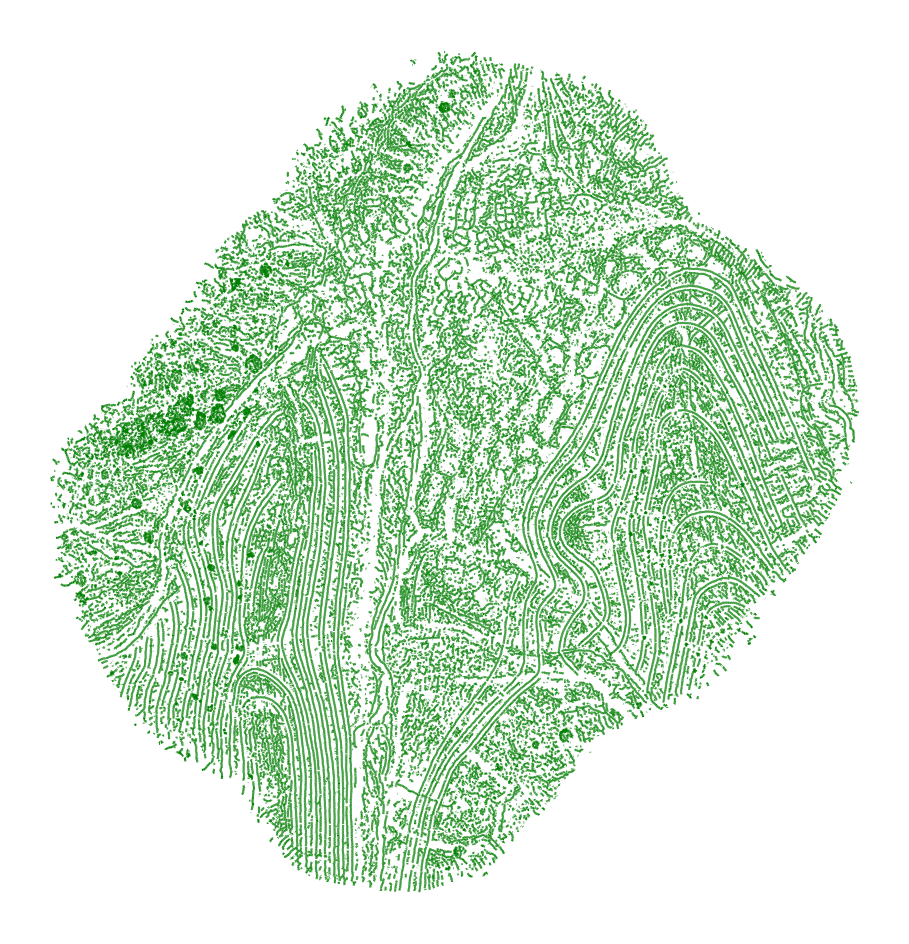

In [7]:
"""Visualize crest lines in 2D"""
from matplotlib.patches import Rectangle
f, ax = plt.subplots(figsize=(24, 12))
frame.plot(aspect=1, color='green', ax=ax)
ax.set_axis_off()

In [55]:
"""Save crest lines as Shapefile"""
frame.to_file(f"{project_filename}.shp")